In [1]:
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [3]:
X,y, = wine.data, wine.target
class_names = wine.target_names
feature_names = wine.feature_names
print(f"Classes: {class_names}")
print(f"Features: {feature_names}")

Classes: ['class_0' 'class_1' 'class_2']
Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Função para avaliação completa
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
    print("\nMatriz de Confusão:")
    print(confusion_matrix(y_test, y_pred))
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred, target_names=class_names))

print("=== Árvore de Decisão ===")
evaluate_model(tree, X_test, y_test)

print("\n=== Random Forest ===")
evaluate_model(rf, X_test, y_test)

=== Árvore de Decisão ===
Acurácia: 0.94

Matriz de Confusão:
[[13  1  0]
 [ 0 14  0]
 [ 0  1  7]]

Relatório de Classificação:
              precision    recall  f1-score   support

     class_0       1.00      0.93      0.96        14
     class_1       0.88      1.00      0.93        14
     class_2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36


=== Random Forest ===
Acurácia: 1.00

Matriz de Confusão:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]

Relatório de Classificação:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1

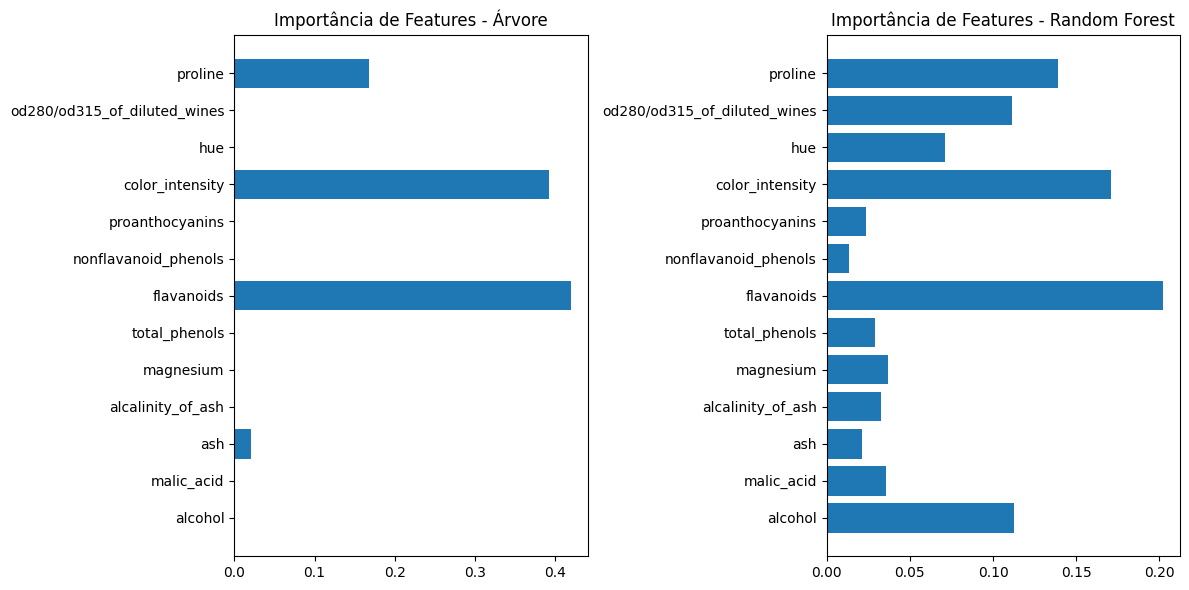

In [8]:
import matplotlib.pyplot as plt

# Feature Importance
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Importância de Features - Árvore")
plt.barh(feature_names, tree.feature_importances_)

plt.subplot(1, 2, 2)
plt.title("Importância de Features - Random Forest")
plt.barh(feature_names, rf.feature_importances_)
plt.tight_layout()
plt.show()

**Exercício 1: Análise de Hiperparâmetros**

Teste diferentes valores para max_depth (2, 5, 10, None)

Para a Random Forest, experimente variar n_estimators (10, 50, 100, 200)

Observe como cada mudança afeta:

* A acurácia

* A matriz de confusão

* O tempo de execução

**Exercício 2: Interpretação dos Resultados**

Compare as feature importances entre os dois modelos:

* Quais features são mais importantes em cada caso?

* Por que elas podem diferir?

Analise os erros na matriz de confusão:

* Quais classes são mais confundidas?

* A Random Forest reduz esses erros?